In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("amazon.csv",encoding='latin1')

In [5]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [6]:
data.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [32]:
data['month'].replace(to_replace = 'Janeiro', value = 'Jan', inplace = True)
data['month'].replace(to_replace = 'Fevereiro', value = 'Feb', inplace = True)
data['month'].replace(to_replace = 'Março', value = 'Mar', inplace = True)
data['month'].replace(to_replace = 'Abril', value = 'Apr', inplace = True)
data['month'].replace(to_replace = 'Maio', value = 'May', inplace = True)
data['month'].replace(to_replace = 'Junho', value = 'Jun', inplace = True)
data['month'].replace(to_replace = 'Julho', value = 'Jul', inplace = True)
data['month'].replace(to_replace = 'Agosto', value = 'Aug', inplace = True)
data['month'].replace(to_replace = 'Setembro', value = 'Sep', inplace = True)
data['month'].replace(to_replace = 'Outubro', value = 'Oct', inplace = True)
data['month'].replace(to_replace = 'Novembro', value = 'Nov', inplace = True)
data['month'].replace(to_replace = 'Dezembro', value = 'Dec', inplace = True)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
year      6454 non-null int64
state     6454 non-null object
month     6454 non-null object
number    6454 non-null float64
date      6454 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


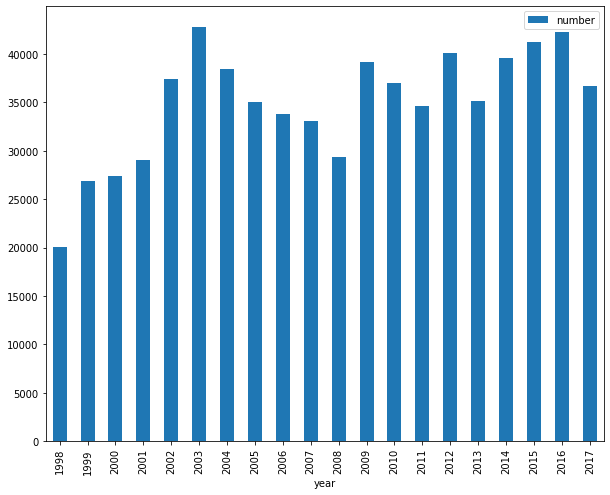

In [34]:
data[['year','number']].groupby(['year']).sum().plot(kind="bar", figsize=(10,8))

In [35]:
year_mo_state = data.groupby(by = ['year','state', 'month']).sum().reset_index()


Text(0, 0.5, 'Number of Fires')

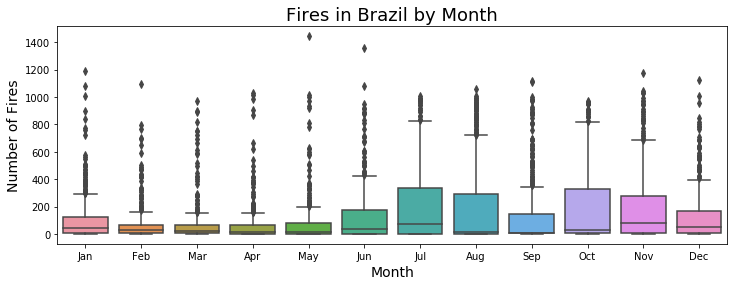

In [36]:
plt.figure(figsize=(12,4))

sns.boxplot(x = 'month',  order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec'], 
            y = 'number', data = year_mo_state)

plt.title('Fires in Brazil by Month',  fontsize = 18)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Number of Fires', fontsize = 14)


Text(0, 0.5, 'Number of Fires')

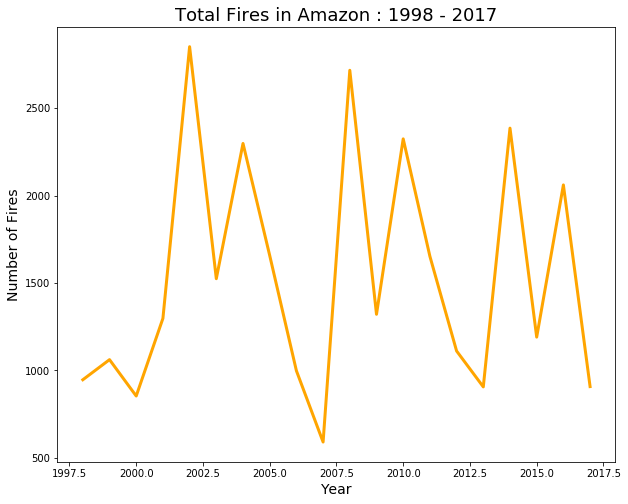

In [29]:
year_mo_state_amazon = data[data['state'] == 'Amazonas'].groupby(['year','state','month']).sum().reset_index()
plt.figure(figsize=(10,8))
sns.lineplot(x='year',y="number",data =year_mo_state_amazon, estimator='sum', color = 'orange',lw = 3,err_style = None)
plt.title('Total Fires in Amazon : 1998 - 2017', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Number of Fires', fontsize = 14)         

Text(0, 0.5, 'Number of Fires')

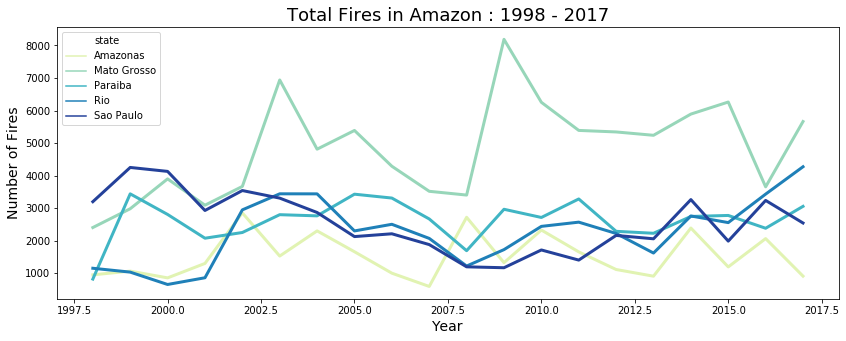

In [31]:
year_mo_state_top_states = data[data['state'].isin(['Amazonas','Mato Grosso','Paraiba','Sao Paulo','Rio'])].groupby(by = ['year','state', 'month']).sum().reset_index()
plt.figure(figsize=(14,5))

ax = sns.lineplot(x = 'year', y = 'number', data = year_mo_state_top_states, hue = 'state', estimator = 'sum', color = 'orange', lw = 3, 
                  err_style = None, palette = 'YlGnBu')

plt.title('Total Fires in Amazon : 1998 - 2017', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Number of Fires', fontsize = 14)

In [41]:
data['Time_date'] = pd.to_datetime(data['date'])

In [42]:
data.head()

,year,state,month,number,date,Time_date
0,1998,Acre,Jan,0.0,1998-01-01,1998-01-01
1,1999,Acre,Jan,0.0,1999-01-01,1999-01-01
2,2000,Acre,Jan,0.0,2000-01-01,2000-01-01
3,2001,Acre,Jan,0.0,2001-01-01,2001-01-01
4,2002,Acre,Jan,0.0,2002-01-01,2002-01-01
